Importing various libraries that we'll be looking to use throughout the data cleaning and visualization process for *insert the name of data I'm looking at here*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!ls zippedData

bom.movie_gross.csv.gz
imdb.name.basics.csv.gz
imdb.title.akas.csv.gz
imdb.title.basics.csv.gz
imdb.title.crew.csv.gz
imdb.title.principals.csv.gz
imdb.title.ratings.csv.gz
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [3]:
df_tb = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df_tr = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df_tc = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
df_ta = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
df_tp = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
df_nb = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
df_tb.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
df_tr.head(5)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
df_tc.head(5)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [7]:
df_ta.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [8]:
df_tp.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [9]:
df_nb.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [10]:
df_combined = df_tb.join(df_tr, how='inner', lsuffix='_tb')
df_combined

,tconst_tb,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt10356526,8.3,31
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt10384606,8.9,559
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt1042974,6.4,20
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt1043726,4.2,50352
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt1060240,6.5,21
...,...,...,...,...,...,...,...,...,...
73851,tt4206656,MarchFourth Marching Band in China,MarchFourth Marching Band in China,2014,66.0,"Documentary,Music",tt9805820,8.1,25
73852,tt4206658,El Bumbún,El Bumbún,2014,85.0,Drama,tt9844256,7.5,24
73853,tt4206724,70 Acres in Chicago: Cabrini Green,70 Acres in Chicago: Cabrini Green,2014,53.0,"Documentary,History,News",tt9851050,4.7,14
73854,tt4207014,Amante de lo ajeno,Amante de lo ajeno,2012,99.0,Drama,tt9886934,7.0,5


In [11]:
df_combined.sort_values(by='averagerating', ascending=False)


,tconst_tb,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes
27644,tt2083374,The Revolutionary Optimists,The Revolutionary Optimists,2013,95.0,"Documentary,Drama",tt8730716,10.0,5
8992,tt1537321,The Middle Men,The Middle Men,2010,70.0,"Biography,Documentary",tt1770682,10.0,5
26153,tt2043900,Last Call at the Oasis,Last Call at the Oasis,2011,105.0,Documentary,tt2632430,10.0,5
65033,tt3719158,Atomic Heart Mother,Madar-e ghalb atomi,2015,97.0,"Drama,Fantasy",tt9715646,10.0,20
57679,tt3360280,Chal Dhar Pakad,Chal Dhar Pakad,2010,129.0,Drama,tt5344358,10.0,6
...,...,...,...,...,...,...,...,...,...
50971,tt3020618,Vampire Guitar: A High Vaultage Adventure,Vampire Guitar: A High Vaultage Adventure,2013,86.0,Comedy,tt6017238,1.0,21
32440,tt2219896,Alice,Alice,2012,82.0,Drama,tt2087999,1.0,7
36456,tt2330308,Fast Forward,Fast Forward,2012,NaN,"Drama,Sci-Fi",tt1896768,1.0,21
54856,tt3219610,Faberge: A Life of Its Own,Faberge: A Life of Its Own,2014,87.0,"Documentary,History",tt1976600,1.0,436


####

Looks like there are a lot of inconsistencies across the data meaning 

In [12]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst_tb        73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73853 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  61529 non-null  float64
 5   genres           72066 non-null  object 
 6   tconst           73856 non-null  object 
 7   averagerating    73856 non-null  float64
 8   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.6+ MB


Once we've combined the two data sets that combined the primary keys (tconst_tb), we can see that there is missing data across 3 columns: original title, runtime_minutes and genres.

1) Original Title - I'm not concerned with the original title missing data because it seems as if this data either matches the primary title OR is an original title that was then changed when the film went to market. In a bit of research here, it looks like the title changed most frequently due to when the film might have debued in a non-US/foreign market. AL to write code to show this data.

2) Runtime_minutes might make sense to create a second table that shows runtime to ratings and see if there is a correlation between rating and runtime_minutes. I don't envision there to be a correlation however we should check to see if that is something that can occur.

3) Genre - I need to check to see if data in any other IMDB tables has this type of data for the same variable. If not, I am going to remove those values when blank.


In [ ]:
## Cleaning up runtime_minutes

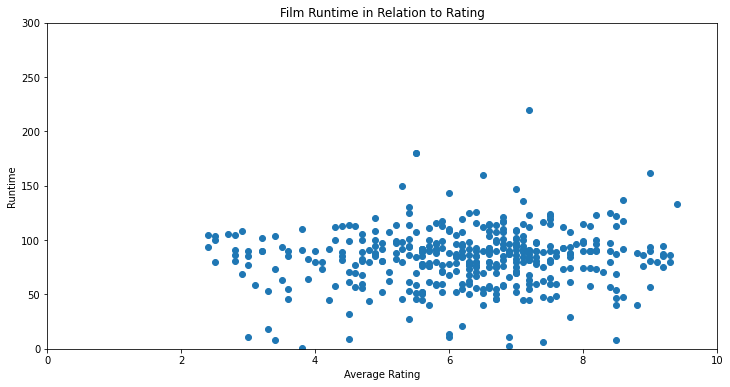

In [16]:
## Graphing the data analysis between runetime and averagerating.

x = df_combined['runtime_minutes'].sample(500)
y = df_combined['averagerating'].sample(500)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylim(0, 300)
ax.set_xlim(0, 10)

ax.set_xlabel("Average Rating")
ax.set_ylabel("Runtime")

ax.set_title("Film Runtime in Relation to Rating")

ax.scatter(y,x)

## I'm definitely not happy with this graph but it kind of shows that there are ALL ranges
## of scores across all different movie lengths. There isn't a clear correlation
## between runtime and score.


Since there is no correlation between runtime and score, this means that Microsoft doesn't need to worry about hitting a specific runtime in order to obtain a high score. Whatever movie they make they should focus more on telling the story they want to tell rather than focusing on a specific runtime.